<a href="https://colab.research.google.com/github/Mirsad-py/ml-projekat-reviews/blob/main/notebook/product_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Koliko redova i kolona dataset sadrži
Kako izgledaju prvi zapisi
Koje kolone postoje i koje tipove podataka imaju
Da li su svi podaci pravilno učitani, bez grešaka

In [1]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/Mirsad-py/ml-projekat-reviews/main/data/product_reviews_full.csv"
df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Dataset shape (rows, columns): (171380, 6)

First 5 rows:


review_uuid  \
0  31b07b9a-4567-4db1-81f6-1bcef33b3e7b   
1  1cb2b4b5-9805-4c2d-9393-6b1382cb7c53   
2  f64165f0-29a2-4cfb-8b15-13c0c893e54d   
3  e442e083-a343-4052-b015-41e531e52d3e   
4  f4abefb8-22f0-4672-af73-2aa2954b24e0   

                                        product_name product_price  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   

      review_title                                        review_text  \
0           Super!  great cooler excellent air flow and for this p...   
1          Awesome              best budget 2 fit cooler nice cooling   
2             Fair  the quality is good but the power of air is de...   
3  Useless product                  very bad product its a only a fan   
4             Fair                                      ok ok product   

  sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   Neutral


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB
Missing values per column:
review_uuid         0
product_name        0
product_price     426
review_title        1
review_text         1
sentiment        5011
dtype: int64


#Vizualizacija nedostajućih vrednosti

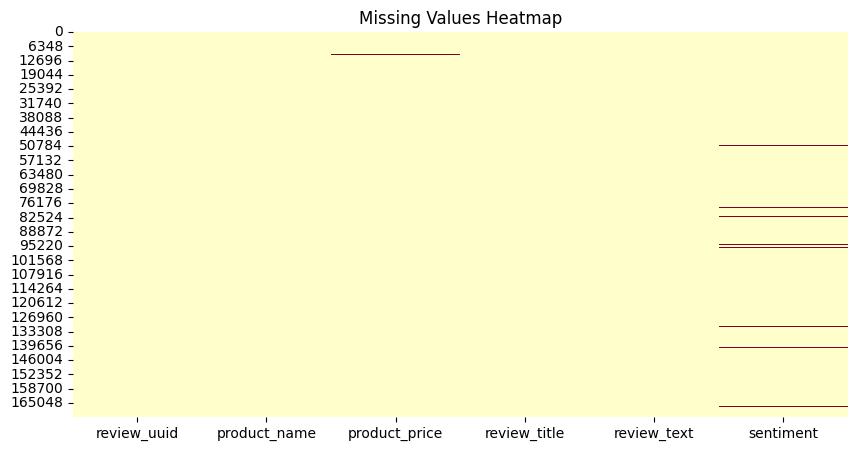

In [2]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

#proverićemo koje vrednosti postoje u koloni sentiment;
#izbrojaćemo koliko recenzija postoji u svakoj klasi u ovoj koloni;
#vizualno ćemo prikazati raspodelu koristeći biblioteke Matplotlib i seaborn.

In [3]:
# Count occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Print counts
print("Sentiment distribution (counts):")
print(sentiment_counts)

Sentiment distribution (counts):
sentiment
positive    85537
negative    32369
Positive    22361
Negative    12392
neutral     10508
Neutral      3202
Name: count, dtype: int64


Nakon ovoga, u analizu ćemo uključiti i vizualizaciju

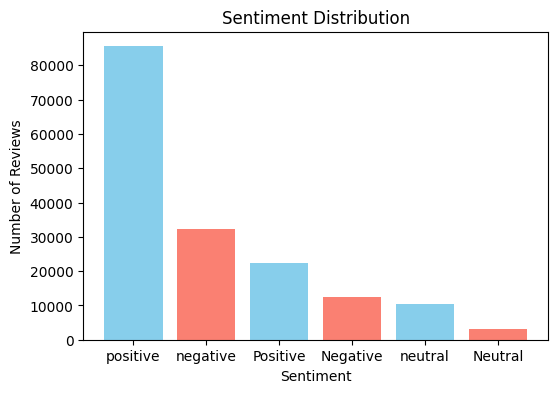

In [4]:
# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

Prikaži tip podatka kolone product_price.
Prikaži nekoliko prvih vrednosti.
Prikaži najčešće vrednosti.
Proveri da li unutar ove kolone ima nestrukturisanih tekstualnih zapisa poput Free ili Not Available?
Pronađi i prikaži sve različite nenumeričke vrednosti.

In [5]:
# 1. Check the data type of the 'product_price' column
print("Data type of product_price column:", df['product_price'].dtype)

# 2. Display the first 10 values from the column
print("\nFirst 10 values in product_price column:")
print(df['product_price'].head(10))

# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in product_price column:")
print(df['product_price'].value_counts().head(20))

# 4. Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
# Identify rows containing these specific non-numeric values
mask_problematic = df['product_price'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f"\nFound {len(df_problematic)} rows with problematic textual values:")
display(df_problematic[['product_price']].drop_duplicates())

# 5. Find and display some of the non-numeric values
price_clean = df['product_price'].astype(str).str.strip()
price_numeric = pd.to_numeric(price_clean, errors='coerce')

invalid_prices = df[price_numeric.isna()]
print("Number of non-numeric prices:", len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))

Data type of product_price column: object

First 10 values in product_price column:
0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object

Top 20 most frequent values in product_price column:
product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3.0         1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64

Found 0 rows with problematic textual values:


Empty DataFrame
Columns: [product_price]
Index: []

Number of non-numeric prices: 68858


product_price
22              NaN
34279        $6.86 
34512        $2.76 
34553        $6.95 
35245        $4.35 
36212       $19.27 
36613       $21.67 
36622        $7.22 
36753        $9.63 
36766        $7.82 
36777       $11.92 
37190       $12.04 
37230        $8.42 
37423        $9.75 
37575        $9.23 
37590        $5.41 
39550        $1.61 
39651        $3.31 
40577        $3.43 
40674        $3.60

#Brisanje praznina: Dataset spreman za dalje

In [6]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (165960, 6)
Missing values per column:
review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64


#ukloniti oznaku za valutu iz tekstualnih vrednosti;
#očistiti eventualne dodatne razmake;
#konvertovati sve vrednosti u numerički tip (float) i
#proveriti rezultate.

In [7]:
#Pretvaramo vrednosti u tekst i čistimo ih.
#Uklanjamo dolar znak, nepotrebne karaktere i razmake:
# Step 1: Convert to string and remove the 'USD' prefix and any leading/trailing spaces
df['product_price_cleaned'] = (
    df['product_price']
    .astype(str)
    .str.replace(r'$', '', regex=True)    # Remove '$'
    .str.replace(r'[^\d.]', '', regex=True) # Remove all non-numeric characters except the dot
    .str.strip()
)

#Pretvaramo očišćeni tekst u numerički tip (float).
# Step 2: Convert cleaned string to float
df['product_price'] = pd.to_numeric(df['product_price_cleaned'], errors='coerce')

#Brišemo privremenu kolonu
# Step 3: Drop the temporary column
df = df.drop(columns=['product_price_cleaned'])

#Uklanjamo redove gde je cena i dalje NaN (neuspešna konverzija).
# Step 4: Drop any rows where conversion failed (still NaN)
df = df.dropna(subset=['product_price'])

#Proveravamo rezultat.
# Step 5: Confirm result
print("Column type after parsing:", df['product_price'].dtype)
print("\nPrice summary:")
print(df['product_price'].describe())



Column type after parsing: float64

Price summary:
count    165960.000000
mean         65.786896
std         135.944167
min           0.180000
25%           4.190000
50%          14.450000
75%          66.250000
max        1566.140000
Name: product_price, dtype: float64


#Analiziramo sve postojeće kolone i biramo koje su zaista važne za naš model (klasifikacija sentimenta).
#Uklanjamo kolone koje nemaju smisla za predviđanje (npr. ID-jevi, prazni naslovi…).
#Proveravamo da li cena proizvoda ima uticaj na ocenu – eksperiment i doza radoznalosti!
#Kreiramo potpuno novu karakteristiku: dužinu recenzije (broj karaktera/reči), jer svaka reč može biti presudna.

In [8]:
#Uklanjamo ih iz našeg DataFramea
# Drop columns that are not useful for modeling
df = df.drop(columns=['review_uuid', 'product_name'])

# Preview remaining columns
print("Remaining columns:")
print(df.columns.tolist())



Remaining columns:
['product_price', 'review_title', 'review_text', 'sentiment']


#Da li zadržati kolonu product_price u modelu?
#analizirati raspon i raspodelu cena u skupu podataka;
#uporediti kako se cene raspoređuju po različitim sentiment klasama;
#vizualizovati podatke radi boljeg uvida.

Price summary by sentiment:
             count       mean         std   min   25%    50%    75%      max
sentiment                                                                   
Negative   12369.0  52.228361  100.417535  0.71  3.60  20.47  52.96  1048.07
Neutral     3191.0  56.500038  108.327270  0.71  3.24  12.04  60.12  1048.07
Positive   22305.0  70.656064  149.220264  0.71  4.19  14.08  66.25  1048.07
negative   32294.0  62.499533  116.414719  0.71  4.39  16.25  66.25  1566.14
neutral    10487.0  55.237890  107.282157  0.71  3.42   9.63  59.02  1204.70
positive   85314.0  69.368051  147.028727  0.18  4.20  14.08  66.25  1048.07


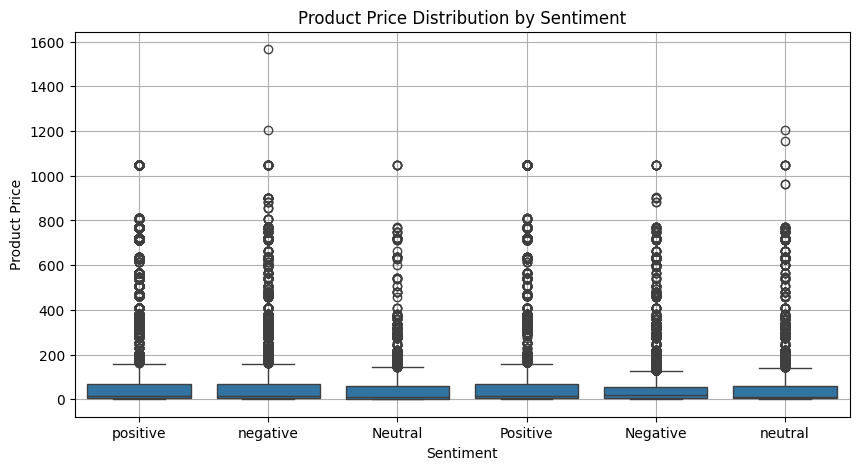

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show summary statistics grouped by sentiment
print("Price summary by sentiment:")
print(df.groupby('sentiment', observed=False)['product_price'].describe())

# Boxplot of prices by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='product_price')
plt.title("Product Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Product Price")
plt.grid(True)
plt.show()

#Nova karakteristika: Dužina recenzije kao skriveni signal?

#Dodajemo novu kolonu – U DataFrame unosimo kolonu review_length, sa brojem karaktera svake recenzije.
#Analiziramo osnovne statistike – Pogledamo prosečnu, minimalnu i maksimalnu dužinu recenzija.
#Poređenje po sentimentu – Ispitujemo da li se dužina recenzije razlikuje kod pozitivnih, negativnih i neutralnih recenzija.
#Vizualizacija – Pravimo boxplot koji jasno pokazuje razlike u dužini recenzija za svaku kategoriju sentimenta.


Review length summary:
count    165960.000000
mean         48.378435
std          76.611087
min           1.000000
25%           9.000000
50%          19.000000
75%          50.000000
max         523.000000
Name: review_length, dtype: float64
Review length statistics by sentiment:
             count       mean        std  min   25%   50%   75%    max
sentiment                                                             
Negative   12369.0  60.013744  75.593599  2.0  16.0  32.0  72.0  523.0
Neutral     3191.0  40.847383  63.927831  1.0   7.0  20.0  46.0  500.0
Positive   22305.0  44.605335  77.651182  1.0   8.0  16.0  41.0  497.0
negative   32294.0  61.240416  79.414896  1.0  16.0  32.0  70.0  497.0
neutral    10487.0  41.591876  64.945545  1.0   7.0  19.0  47.0  500.0
positive   85314.0  43.925229  76.423486  1.0   8.0  15.0  41.0  494.0


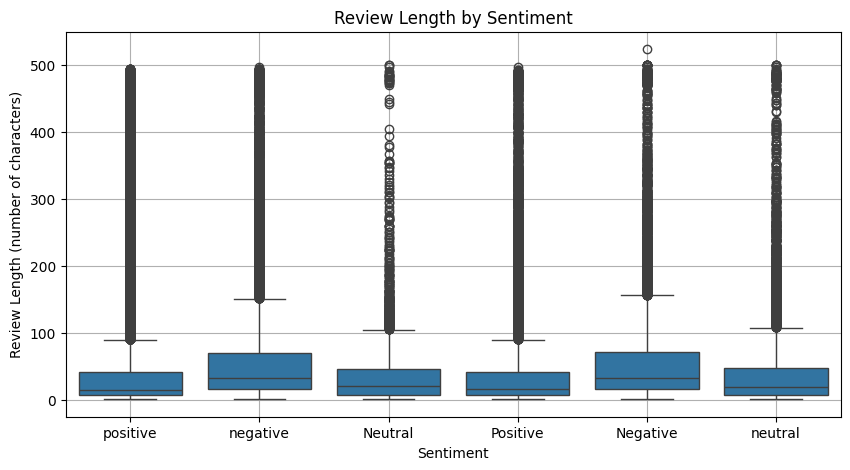

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create new column with length of each review_text
df['review_length'] = df['review_text'].astype(str).str.len()

# Show basic stats
print("Review length summary:")
print(df['review_length'].describe())

# Group by sentiment and describe review length
print("Review length statistics by sentiment:")
print(df.groupby('sentiment', observed=False)['review_length'].describe())

# Visualize distribution of review length by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='review_length')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (number of characters)")
plt.grid(True)
plt.show()

#delimo podatke na skupove za treniranje i testiranje – tako da poređenje bude fer i transparentno;
#treniramo nekoliko različitih algoritama na istim podacima;
#evaluiramo svaki model koristeći ključne metrike: preciznost, odziv, F1 skor i ukupnu tačnost;
#analiziramo rezultate i diskutujemo o tome koji model daje najbolji balans između performansi i jednostavnosti primene.

In [11]:
# Features and label
X = df[["review_title", "review_text", "review_length"]]
y = df["sentiment"]

In [12]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer



# Preprocessor: TF-IDF for text, MinMaxScaler for numeric feature
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(), "review_title"),
        ("text", TfidfVectorizer(), "review_text"),
        ("length", MinMaxScaler(), ["review_length"])
    ]
)

#Definisanje, treniranje i evaluacija modela


#Prvo tekst i brojevi ulaze u obradu (TF–IDF, skaliranje...).
#Onda različiti modeli pokušavaju da nauče obrasce iz podataka.
#Na kraju, svaki model pokazuje svoje rezultate – i sve to elegantno u par linija koda!


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC()
}

# Train and evaluate
for name, model in models.items():
    print(f"\n{name}")
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifer", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))



Logistic Regression
              precision    recall  f1-score   support

    Negative       0.64      0.14      0.23      2474
     Neutral       0.29      0.01      0.01       638
    Positive       0.10      0.00      0.00      4461
    negative       0.66      0.90      0.76      6459
     neutral       0.55      0.53      0.54      2097
    positive       0.76      0.97      0.85     17063

    accuracy                           0.72     33192
   macro avg       0.50      0.42      0.40     33192
weighted avg       0.62      0.72      0.64     33192


Naive Bayes


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Negative       0.77      0.02      0.04      2474
     Neutral       0.00      0.00      0.00       638
    Positive       0.57      0.00      0.00      4461
    negative       0.62      0.87      0.73      6459
     neutral       0.65      0.25      0.36      2097
    positive       0.72      0.98      0.83     17063

    accuracy                           0.69     33192
   macro avg       0.55      0.35      0.33     33192
weighted avg       0.67      0.69      0.59     33192


Decision Tree
              precision    recall  f1-score   support

    Negative       0.30      0.26      0.28      2474
     Neutral       0.12      0.08      0.10       638
    Positive       0.22      0.12      0.16      4461
    negative       0.65      0.70      0.67      6459
     neutral       0.49      0.50      0.50      2097
    positive       0.76      0.85      0.80     17063

    accuracy                           0.64     33192
   macro